# Simple Linear Regression

## First Case Study: Dataset

This case study would help in understanding how advertisement spends done by compnay for their product has helped in driving their Sales Revenue and also helping us in planning the future advertisement spends. We have two variables in this dataset.

AdSpends: The advertising expenditure(in thousands of dollars)
SalesRevenue: The sales revenue(in thousands of dollars)

# Problem:

Analyze and build a model using the given dataset to predict the Sales Revenue based on the advertisement expenditure.

Also provide explaination to all the below questions:

1.Find the 5-point summary of the dataset.

2.Plot the dataset to see how the data is distributed.

3.Determine how the varaibles are related to each other , if there is any relation, explain it.

4.Build the linear regression model.

5.Perform all the model diagonostics.

6.Use the model built to predict for an AdSpend=50.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/867/439/41e/01_-_SLR_AdSpendVsSales.csv')


In [3]:
sales.shape

(20, 2)

In [4]:
sales.head()

,AdSpend,SalesRevenue
0,30.0,289
1,25.5,240
2,26.5,252
3,27.0,255
4,27.0,254


In [5]:
sales.tail()

,AdSpend,SalesRevenue
15,30.0,282
16,40.0,346
17,43.0,350
18,45.0,371
19,25.0,238


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AdSpend       20 non-null     float64
 1   SalesRevenue  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [7]:
sales.describe()

,AdSpend,SalesRevenue
count,20.000000,20.000000
mean,32.250000,291.600000
std,5.734246,38.692308
min,25.000000,238.000000
25%,27.750000,261.750000
50%,31.000000,285.500000
75%,34.500000,312.500000
max,45.000000,371.000000


# EDA

In [8]:
sales.corr()
#It is clearly visible that AdSpend is highly positively correlated with 
#SalesRevenue.

,AdSpend,SalesRevenue
AdSpend,1.000000,0.978282
SalesRevenue,0.978282,1.000000


Text(0, 0.5, 'Sales Revenue')

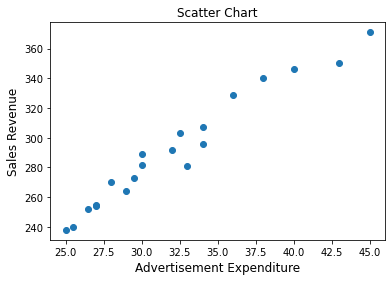

In [9]:
plt.scatter(sales['AdSpend'],sales['SalesRevenue'])
plt.title('Scatter Chart',fontsize=12)
plt.xlabel('Advertisement Expenditure' , fontsize = 12)
plt.ylabel('Sales Revenue',fontsize = 12)

#we can see that this is a positive linear relationship
# So as AdSpend increases then Sales Revenue also increases.

# Define X & Y (Independent and Dependent Variable)
Our main objective is to see how SalesRevenue can be explained with AdSpend.

Hence Sales will be Dependent Variable and AdSpend will be independent variable.

In [10]:
sales.head()

,AdSpend,SalesRevenue
0,30.0,289
1,25.5,240
2,26.5,252
3,27.0,255
4,27.0,254


In [11]:
x = sales.iloc[:,0:1].values#IndpendentVariable - AdSpends
y = sales.iloc[:,1].values #Dependent variable - Sales Revneue

In [12]:
x

array([[30. ],
       [25.5],
       [26.5],
       [27. ],
       [27. ],
       [32.5],
       [28. ],
       [29.5],
       [34. ],
       [29. ],
       [36. ],
       [33. ],
       [34. ],
       [32. ],
       [38. ],
       [30. ],
       [40. ],
       [43. ],
       [45. ],
       [25. ]])

In [13]:
x.shape

(20, 1)

In [14]:
y

array([289, 240, 252, 255, 254, 303, 270, 273, 307, 264, 329, 281, 296,
       292, 340, 282, 346, 350, 371, 238], dtype=int64)

In [15]:
y.shape

(20,)

# Build the model (Using Sklearn method)

In [16]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [17]:
#creating an instance of the Linear Regression class to use thhis for 
#whatever we will do
model = LinearRegression()

In [18]:
#Fitting the model on x and y
model.fit(x,y)

LinearRegression()

In [19]:
#Now creating a y_pred variable which would predict y based on whatever
#be the value of x.
y_pred = model.predict(x) #this is the predicted y

# Graphical representation of Linear Regression Line

(230.0, 400.0)

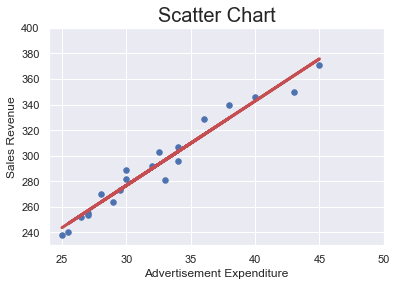

In [20]:
plt.scatter(sales['AdSpend'],sales['SalesRevenue'],s=30)
plt.plot(x,y_pred,linewidth=3, color='r')
plt.title('Scatter Chart',fontsize=20)
plt.xlabel('Advertisement Expenditure',fontsize=12)
plt.ylabel('Sales Revenue',fontsize=12)
plt.xlim([24.0,50.0])
plt.ylim([230,400])

## Getting the intercept b0

In [21]:
model.intercept_

78.71644657863152

## Getting the coefficient

In [22]:
model.coef_

array([6.60104042])

# Evalutaing the model - Metrics


For evaluating the model we see three parameters i.e Rsquared , MSE , RMSE

For a good model:

->Rsqaured should be high

->MSE and RMSE should be low

In [23]:
from sklearn import metrics

In [24]:
Rsquared = round(metrics.r2_score(y,y_pred),4)
Rsquared

0.957

In [25]:
#Mean squared Error
MSE = round(metrics.mean_squared_error(y,y_pred),4)
MSE

61.1055

In [26]:
#Root MSE
RMSE= round(np.sqrt(MSE),4)
RMSE

7.817

# Make Predictions

In [28]:
y_predict = model.predict(x)
y_predict

array([276.74765906, 247.04297719, 253.64401761, 256.94453782,
       256.94453782, 293.2502601 , 263.54557823, 273.44713886,
       303.15182073, 270.14661865, 316.35390156, 296.55078031,
       303.15182073, 289.9497399 , 329.55598239, 276.74765906,
       342.75806323, 362.56118447, 375.76326531, 243.74245698])

In [29]:
y

array([289, 240, 252, 255, 254, 303, 270, 273, 307, 264, 329, 281, 296,
       292, 340, 282, 346, 350, 371, 238], dtype=int64)

In [31]:
#Collection of Original  Values in a new DataFrame

values = pd.DataFrame(y,columns = ['Original'])
values.head()

,Original
0,289
1,240
2,252
3,255
4,254


In [32]:
#Adding predicted values in same DataFrame
values['Predicted'] = pd.Series(y_predict)
values.head()

,Original,Predicted
0,289,276.747659
1,240,247.042977
2,252,253.644018
3,255,256.944538
4,254,256.944538


# Predicting new Data

## Sklearn - Making predictions of New Data

In [33]:
y_predict = model.predict([[50]])
y_predict

array([408.76846739])

In [34]:
model.intercept_

78.71644657863152

In [35]:
model.coef_

array([6.60104042])

In [36]:
y_new = 78.71644657863152 + 6.60104042*100
y_new

738.8204885786315